# Variance of independent samples

For independent samples, where an observable $A$ is measured at each timestep $i$, the variances should be on average equally distributed.
This means, when we have a total of $n$ steps, and block them into blocks of size $m$, then we can take the variance of the individual blocks, $A^{(m)}$. These should scale as

$$
\mathrm{Var}(A^{(m)}) = \frac{1}{m} \mathrm{Var}(A)
$$

We try to demonstrate this by just taking samples from a Gaussian distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
n = 1000000

m = 10

A = np.random.normal(0,1,size=(n))

Am = np.reshape(A, (-1,m))

Am_average = Am.mean(axis=1)

print(np.var(Am_average)*m)

0.9998182676231091


In [ ]:
from functools import reduce

def factors(n):
    '''Finds the factors of a number'''
    return np.array(reduce(
        list.__add__,
        ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

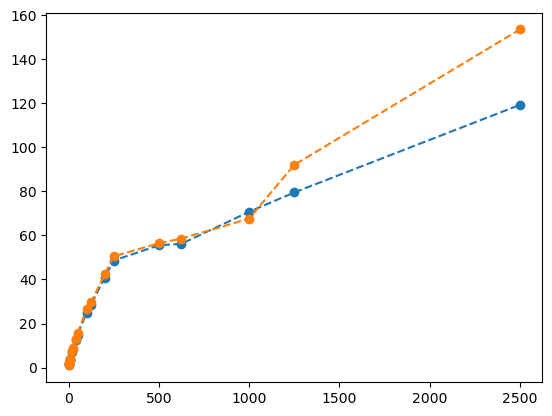

In [45]:
t, acceptance, U, p = np.loadtxt('log.dat', unpack = True)

def calculate_correlation_time(variable):
    n = len(variable)

    m = np.sort(factors(n))

    correlation_time = np.zeros(m.shape)
    var = np.var(variable)

    for j, mm in enumerate(m):
        Am = np.reshape(variable, (-1,mm))
        Am_average = Am.mean(axis=1)
        correlation_time[j] = np.var(Am_average)*mm/var/2
    return m, correlation_time

x, varU = calculate_correlation_time(U)

_, varP = calculate_correlation_time(p)
del(_)

plt.plot(x,varU, '--o')
plt.plot(x,varP, '--o')


plt.show()


